# Practical Session 2 : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

In [ ]:
#Dowmloading images
!wget https://perso.telecom-paristech.fr/rachddou/teaching_material/images.zip
!unzip -qq images.zip 
!rm images.zip
!rm -rf __MACOSX

--2022-11-12 13:01:29--  https://perso.telecom-paristech.fr/rachddou/teaching_material/images.zip
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22981078 (22M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  21.92M  13.9MB/s    in 1.6s    

2022-11-12 13:01:31 (13.9 MB/s) - ‘images.zip’ saved [22981078/22981078]



In [ ]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import skimage.feature as ft
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical morphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the functions of the morpho library to visualize a disk structuring element of radius 3. 

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


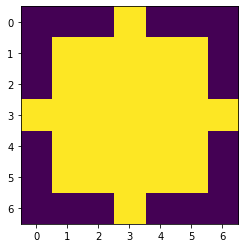

In [ ]:
if student :
  strell = morpho.disk(3)   # morpho disk of radius 3

print(strell)
plt.imshow(strell)
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

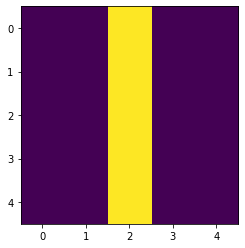

In [ ]:
def line_strell(l):
  if student :
    strell = np.empty([l, l]);
    for i in range(l):
      for j in range(l):
        if (j == l//2):
          strell[i,j] = 1
        else:
          strell[i,j] = 0

  return(strell)

if student : 
  l = 5
  strell_line = line_strell(l)
  plt.imshow(strell_line)
  plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

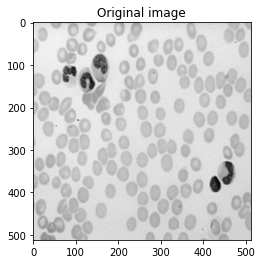

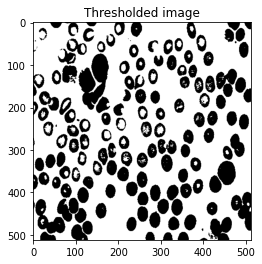

In [ ]:
def threshold(im, th): 
    """ 
    Returns a white image (255) if im >= threshold
    Returns a black image (0) otherwise
    """

    imt = np.float32(im.copy())
    mask = imt < th
    imt[mask] = 0
    imt[~mask] = 255

    return imt

if student:
  img = skio.imread("images/cell.tif")
  plt.title('Original image')
  plt.imshow(img, cmap='gray')   # original image
  plt.show()

  img_th = threshold(img, 150)       # thresholded image
  plt.title('Thresholded image')
  plt.imshow(img_th, cmap='gray')
  plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

---- Disk of ray 3 ----



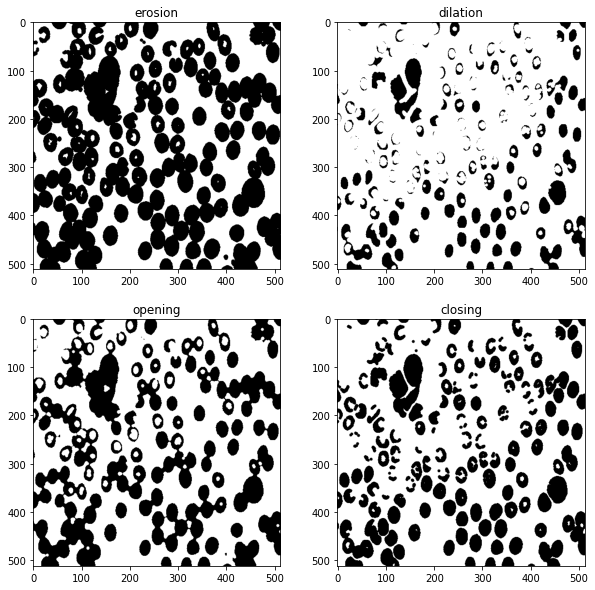




---- Disk of ray 5 ----



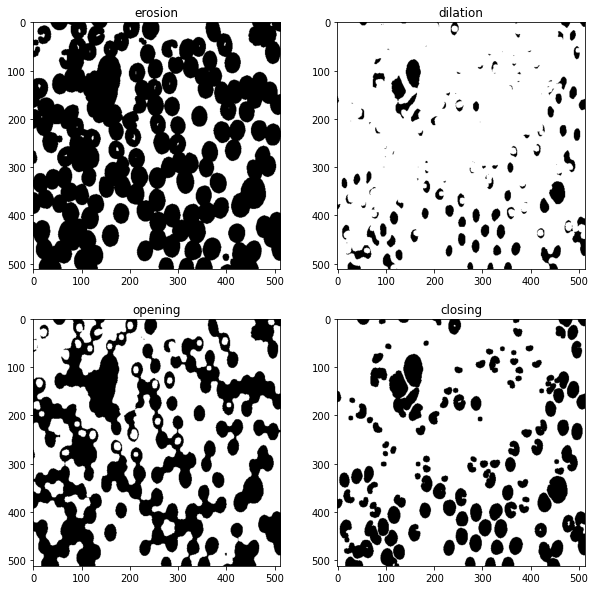




---- Line of length 5 ----



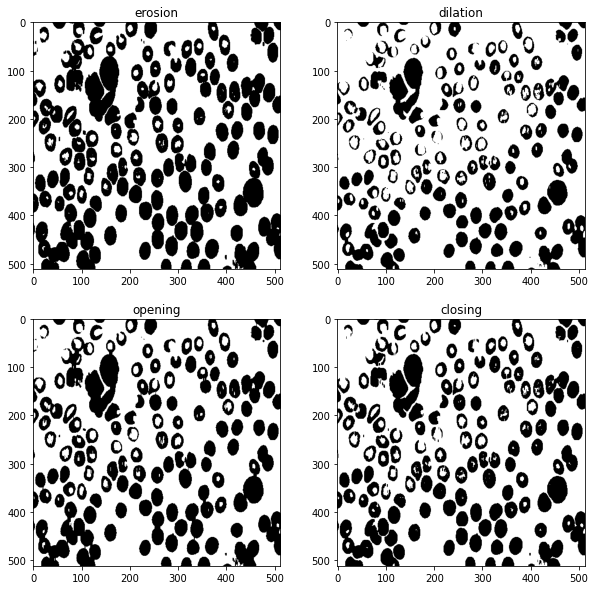

In [ ]:
def applyBinaryMorphology(strell, im):
  fig,ax = plt.subplots(2, 2, figsize=(10,10))

  im_er = morpho.binary_erosion(im, strell)
  im_dl = morpho.binary_dilation(im, strell)
  im_op = morpho.binary_opening(im, strell)
  im_cl = morpho.binary_closing(im, strell)

  imgs = [im_er, im_dl, im_op, im_cl]
  names = ['erosion', 'dilation', 'opening', 'closing']

  for i in range(4):
    ax[i//2, i%2].set_title(names[i])
    ax[i//2, i%2].imshow(imgs[i], cmap='gray')
  plt.show()

# varying the size of the structed elements
if student :
  strell1 = morpho.disk(3)
  strell2 = morpho.disk(5)
  strell3 = line_strell(5)

  print('---- Disk of ray 3 ----\n')
  applyBinaryMorphology(strell1, img_th)

  print('\n\n')
  print('---- Disk of ray 5 ----\n')
  applyBinaryMorphology(strell2, img_th)

  print('\n\n')
  print('---- Line of length 5 ----\n')
  applyBinaryMorphology(strell3, img_th)

- **Q** : What is the influence of the shape of the structuring element ?
- **A** : The struturing element is shape that correspond to a matrix that will convolutionate with a image. The purpose of such element is to take conclusion on how one fits the shapes or misses it. The result will follow the shape of s.e. (structuring element). For example, the dilation with a line extends the quatity of pixels valued one in the vertical direction. In contrast, a disk tends to perform a rounding calculation with the pixels.


- **Q** : What is the influence of the size of the structuring element ?
- **A** : The size of the structuring element determines whether a pixel in the neighborhood will be considered or not. Bigger the size, more pixels are included. 

### Grayscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


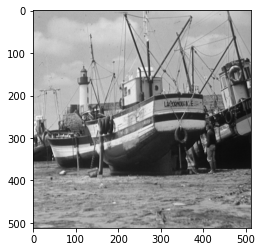

In [ ]:
#load the bateau image in grayscale and display it 
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes. 

---- Diamond of ray 3 ----



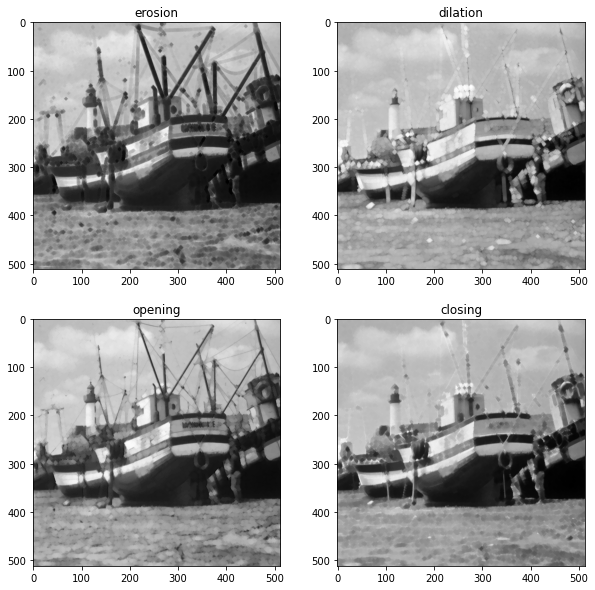




---- Diamond of ray 5 ----



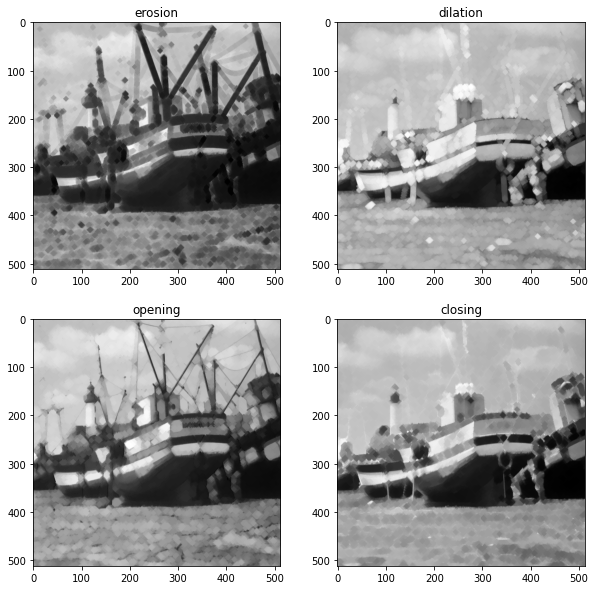




---- Line of length 5 ----



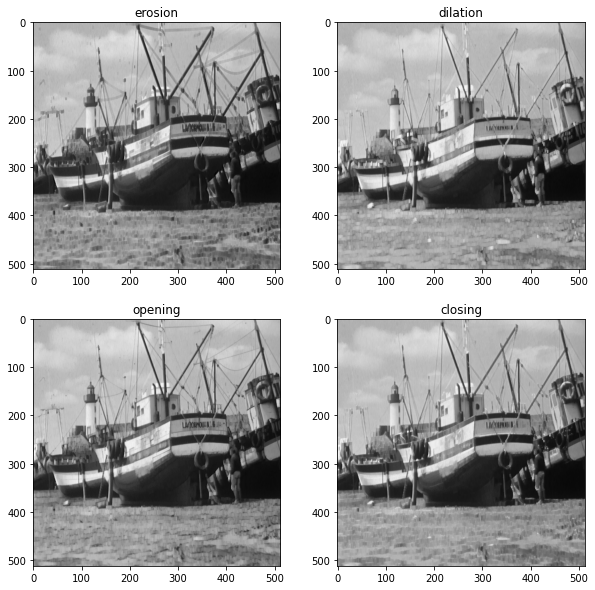

In [ ]:
def applyGrayscaleMorphology(strell, im):
  fig,ax = plt.subplots(2, 2, figsize=(10, 10))

  im_er = morpho.erosion(im, strell)
  im_dl = morpho.dilation(im, strell)
  im_op = morpho.opening(im, strell)
  im_cl = morpho.closing(im, strell)

  imgs = [im_er, im_dl, im_op, im_cl]
  names = ['erosion', 'dilation', 'opening', 'closing']

  for i in range(4):
    ax[i//2, i%2].set_title(names[i])
    ax[i//2, i%2].imshow(imgs[i], cmap='gray')
  plt.show()

if student:
  strell1 = morpho.diamond(3)
  strell2 = morpho.diamond(5)
  strell3 = line_strell(5)

  print('---- Diamond of ray 3 ----\n')
  applyGrayscaleMorphology(strell1, img)

  print('\n\n')
  print('---- Diamond of ray 5 ----\n')
  applyGrayscaleMorphology(strell2, img)

  print('\n\n')
  print('---- Line of length 5 ----\n')
  applyGrayscaleMorphology(strell3, img)

- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : The grayscale morphology has the same concepts of the binary morphology. The difference is that when functions are used instead of sets, we consider the structuring element having a certain volume over each pixel. Increase the size of the s.e. consider more pixels in the calculation (can cause a smothing effect in dilation). The influence of the shape is that they are reflected in the resulting image. For example, when the diamond is used as s.e., it is possible to see them in the images. The same analyse applies to the line.

- **Q** : How can you illustrate the iterativity property of the dilation ? What is the
result of a dilation by a structuring element of size 2 followed by a dilation by a
structuring element of size 3 (and same shape) ? Show your illustration in the next cell.
- **A** : The iterativity property can be illustrated as followed in the code. The base idea is that, the dilation by a structured element of ray/length 2X has the same result as two dilations by a s.e. of ray/length X. As it possible to see in the example image plotted below, the dilation by a disk of ray 2 has the same result as two dilations by a disk of ray equals to 1.
The dilation by a structuring element of size 2 followed by a dilation by a
structuring element of size 3 with the same shape also follows the iterativity property: 2 followed by 3 is equal to a dilation with a s.e. of size 2+3. (Minkowski Addition).

---- Iterativity of dilation ----



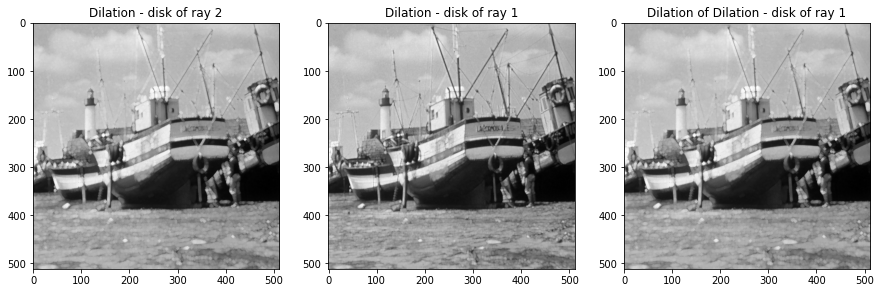




---- Followed dilations ----



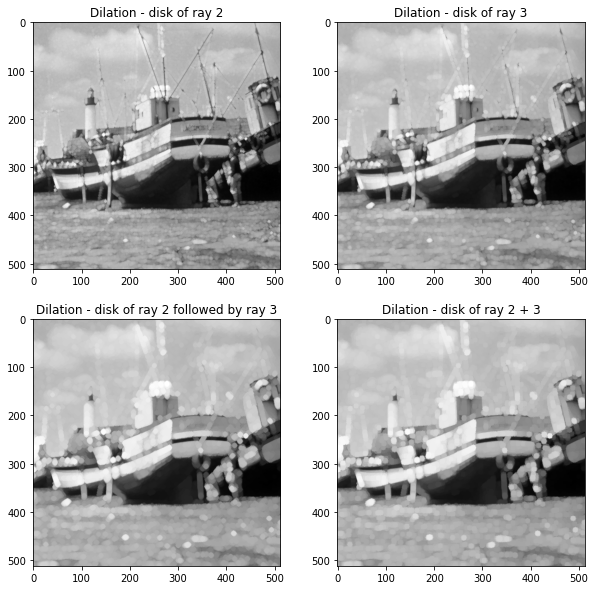

In [ ]:
def iterationDilation(im, strell1, strell2, s1, s2):
  img_dilRa = morpho.dilation(im, strell1)            
  img_dilRb_a = morpho.dilation(im, strell2)          
  img_dilRb_b = morpho.dilation(img_dilRb_a, strell2)  

  fig,ax = plt.subplots(1, 3, figsize=(15, 15))
  imgs = [img_dilRa, img_dilRb_a, img_dilRb_b]
  tts = [
      'Dilation - disk of ray {}'.format(s1), 
      'Dilation - disk of ray {}'.format(s2), 
      'Dilation of Dilation - disk of ray {}'.format(s2)
      ]

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')
  plt.show()

def followedDilations(im, strell1, strell2, strell3, s1, s2):
  img_dilRa = morpho.dilation(im, strell1)            
  img_dilRb = morpho.dilation(im, strell2)          
  img_dilRa_Rb = morpho.dilation(img_dilRa, strell2)
  img_dilRa_p_Rb = morpho.dilation(im, strell3)

  fig,ax = plt.subplots(2, 2, figsize=(10, 10))
  imgs = [img_dilRa, img_dilRb, img_dilRa_Rb, img_dilRa_p_Rb]
  tts = [
      'Dilation - disk of ray {}'.format(s1), 
      'Dilation - disk of ray {}'.format(s2), 
      'Dilation - disk of ray {} followed by ray {}'.format(s1, s2),
      'Dilation - disk of ray {} + {}'.format(s1, s2)
      ]

  for i in range(4):
    ax[i//2, i%2].set_title(tts[i])
    ax[i//2, i%2].imshow(imgs[i], cmap='gray')
  plt.show()

if student:
  size1 = 1
  size2 = 2
  size3 = 3
  size4 = size2 + size3

  disk_r2 = morpho.disk(size2)
  disk_r1 = morpho.disk(size1)
  disk_r3 = morpho.disk(size3)
  disk_r2_r3 = morpho.disk(size4)

  # illustrating the iterativity property of dilation
  print('---- Iterativity of dilation ----\n')
  iterationDilation(img, disk_r2, disk_r1, size2, size1)

  # followed dilations
  print('\n\n')
  print('---- Followed dilations ----\n')
  followedDilations(img, disk_r2, disk_r3, disk_r2_r3, size2, size3)

- **Q:** How can you illustrate the idempotence of closing? Show your illustration in the following cell.

- **A:** The idempotence of closing can be explained as follows: If a transformation $Ψ$ is applied (in this case closing) to an image $I$, if we apply the result to the same transformation $Ψ$, we have an unchanged result.

$$ ∀f, Ψ[Ψ(f)] = Ψ(f) $$

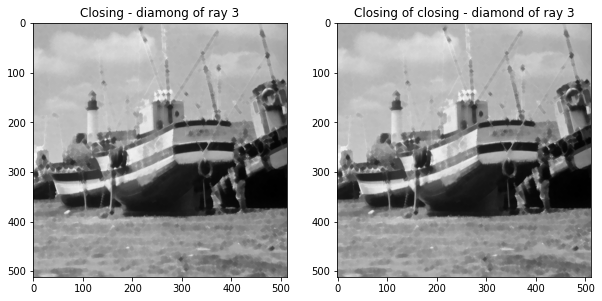

In [ ]:
if student :
  sizeD = 3
  diamond_r3 = morpho.diamond(sizeD)

  img_clos = morpho.closing(img, diamond_r3)       # first transformation
  img_clos2 = morpho.closing(img_clos, diamond_r3) # transf. of transf.

  fig,ax = plt.subplots(1, 2, figsize=(10, 10))
  imgs = [img_clos, img_clos2]
  tts = [
      'Closing - diamong of ray {}'.format(sizeD), 
      'Closing of closing - diamond of ray {}'.format(sizeD)
      ]

  for i in range(2):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')
  plt.show()

- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : This operation extracts the narrow peaks of the image. If the structuring element has the size X, the detected peaks are greater than or equal to the s.e.. If the size of the s.e. is increased, more peaks are detected, but with that other elements we have no interest in. Depending on the choice of the structuring element, we see the difference of what the s.e. eliminated.

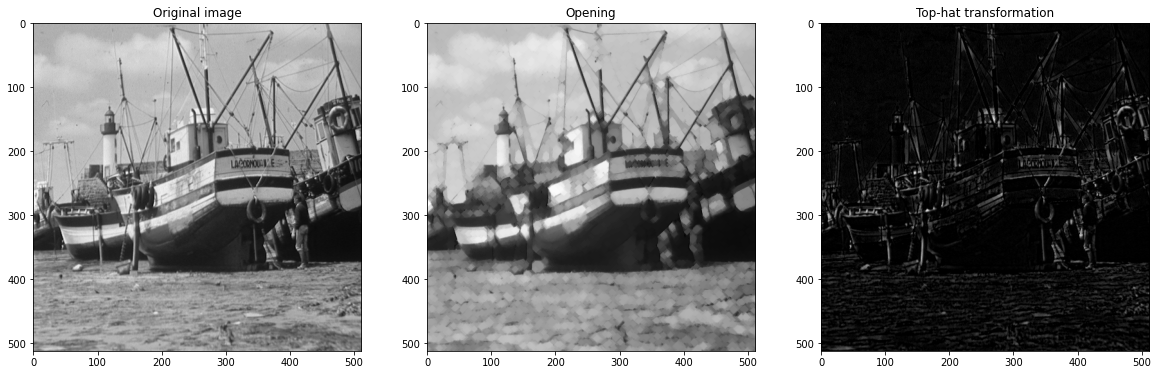

In [ ]:
if student:
  strell = morpho.diamond(4)
  img_op = morpho.opening(img, strell)
  top_hat = img - img_op

  fig,ax = plt.subplots(1, 3, figsize=(20, 20))
  imgs = [img, img_op, top_hat]
  tts = [
      'Original image', 
      'Opening',
      'Top-hat transformation'
      ]

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : As the top-hat captures the peaks, the dual top-hat captures the valleys of the image. Depending on the choise of the structuring element, we see what was captured by the s.e..

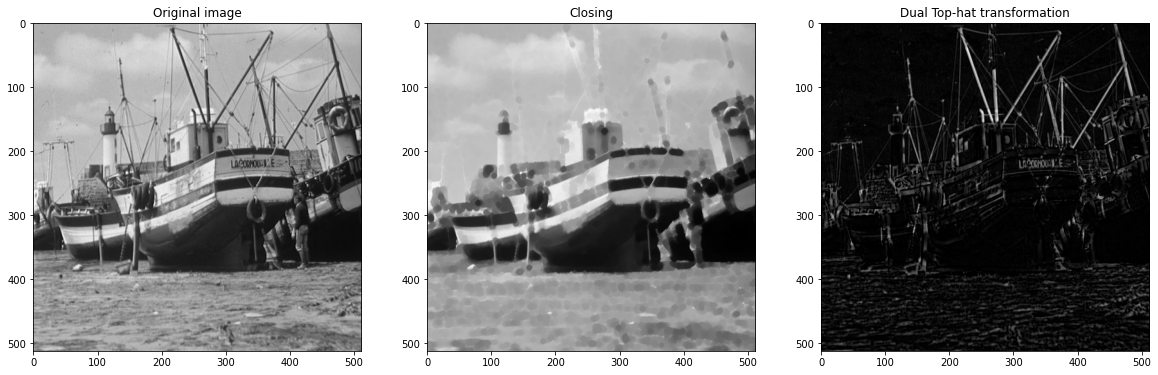

In [ ]:
if student:
  strell = morpho.disk(4)
  img_cl = morpho.closing(img, strell)
  dual_top_hat = img_cl - img

  fig,ax = plt.subplots(1, 3, figsize=(20, 20))
  imgs = [img, img_cl, dual_top_hat]
  tts = [
      'Original image', 
      'Closing',
      'Dual Top-hat transformation'
      ]

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by using the following code and trying out your own combinations. What kind of filtering can be expected from such
operations?
- **A**: This kind of filter is used to remove noise gradually, both white noise (positive peaks) and black noise (valleys). It is possible to observe that, as the size of the structuring element grows and more fases are added, more details are lost and smoother is the image.

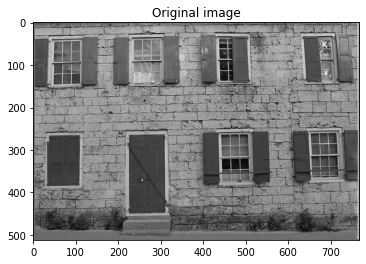




---- Alternating Filters ----


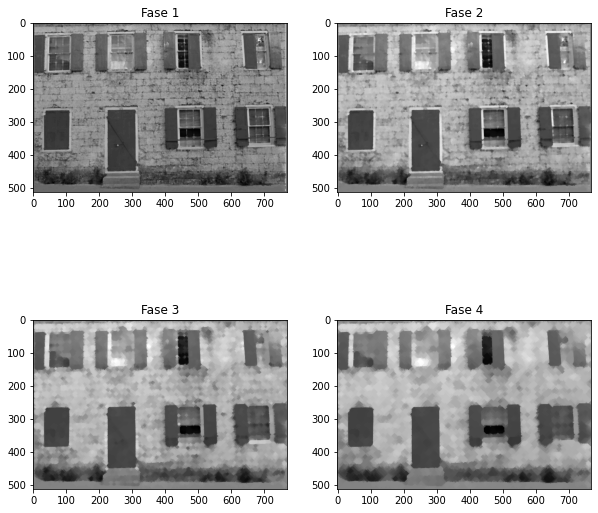

In [ ]:
if student:
  img = skio.imread('images/facade.tif')

  se_a = morpho.diamond(1)
  se_b = morpho.diamond(2)
  se_c = morpho.diamond(4)
  se_d = morpho.diamond(6)

  fase1 = morpho.closing(morpho.opening(img, se_a), se_a)
  fase2 = morpho.closing(morpho.opening(fase1, se_b), se_b)
  fase3 = morpho.closing(morpho.opening(fase2, se_c), se_c)
  fase4 = morpho.closing(morpho.opening(fase3, se_d), se_d)

  plt.imshow(img, cmap = "gray")
  plt.title('Original image')
  plt.show()

  print('\n\n')
  print('---- Alternating Filters ----')

  fig, ax = plt.subplots(2, 2, figsize = (10, 10))
  imgs = [fase1, fase2, fase3, fase4]
  tts = ['Fase 1', 'Fase 2', 'Fase 3', 'Fase 4']

  for i in range(4):
    ax[i//2, i%2].set_title(tts[i])
    ax[i//2, i%2].imshow(imgs[i], cmap='gray')
  plt.show()

### Segmentation
 - **Q**: Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: With a structural element of radius equals to one it is not very obvious to see the characteristics of erosion and dilation. Nevertheless, in the erosion, it is possible to observe that the black parts are more highlighted and the white parts are reduced. In the dilation, the contrary is observable: the blank parts are greater and the black ones smaller.
When the difference between them is made, what is actually done is the difference between greater white pixels and greater black pixels, which results in contours of the image.

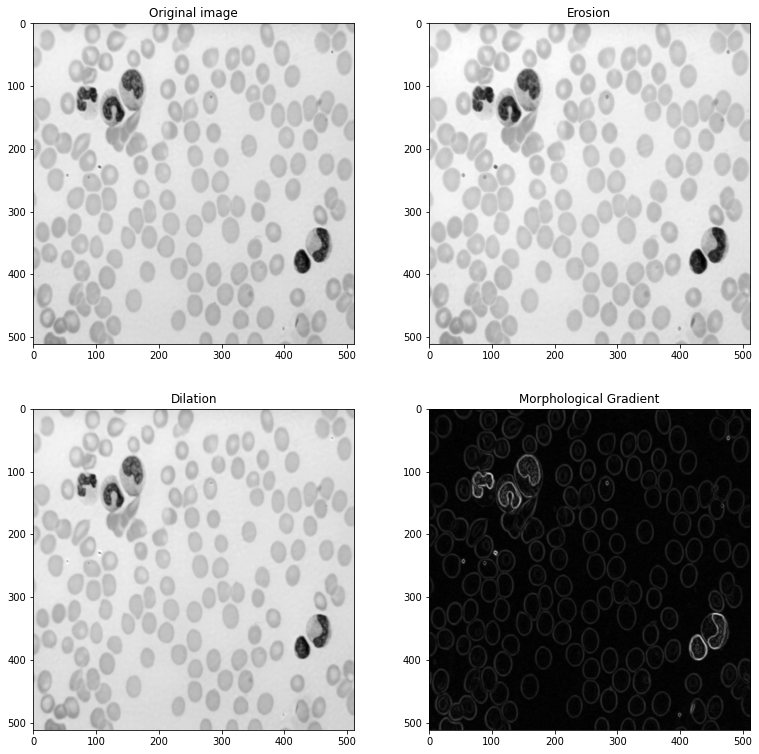

In [ ]:
if student : 
  img = skio.imread("images/cell.tif")
  se = morpho.disk(1)
  im_er = morpho.erosion(img, se)
  im_dl = morpho.dilation(img, se)
  morpho_grad = im_dl - im_er

  fig, ax = plt.subplots(2, 2, figsize = (13, 13))
  imgs = [img, im_er, im_dl, morpho_grad]
  tts = ['Original image',
         'Erosion',
         'Dilation',
         'Morphological Gradient'
         ]

  for i in range(4):
    ax[i//2, i%2].set_title(tts[i])
    ax[i//2, i%2].imshow(imgs[i], cmap='gray')
  plt.show()

- **Q** : Try to threshold the gradient with a value of 25 for instance. Why it is difficult to find an appropriate threshold value ?

- **A** : This method does not find exactly the maximum gradient of the image. We calculating the dilation and the erosion, the structuring element takes the maximum and the minimum value, respectively, of the neighboors around the pixel in consideration. Depending on the region of the image, the blank part could have enhanced, but with a low value. Because of that, the morphological gradient is more difficult to be applied with a correct threshold. In this case, as the thresh increases, some edges are lost, along with captured noise from the morphological filter. Thresholding can segment objects from the background only if the objects are well separated from each other and have intensity values that differ significantly from the background.

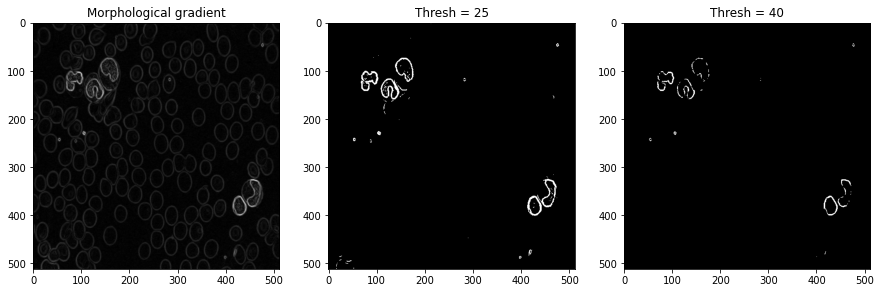

In [ ]:
if student :
  thresh_grad1 = threshold(morpho_grad, 25)
  thresh_grad2 = threshold(morpho_grad, 40)

  fig,ax = plt.subplots(1, 3, figsize=(15, 15))
  imgs = [morpho_grad, thresh_grad1, thresh_grad2]
  tts = [
      'Morphological gradient', 
      'Thresh = 25',
      'Thresh = 40'
      ]

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')

- **Q** Apply the watershed algorithm to the gradient image using morpho.watershed(morpho_grad,k). What do you observe ? 
- **A** : The watershed algorithm tries to segment the image (separate different objects) according to the k specified. This algorithm treates the image like it was  topographic map: the pixels to which the gradient assigned the highest value represent the deepest parts of each catchment basin and the image background represents the land surrounding the catchment basins. Imagining a real situation, if it starts to rain and the water fills the basins, eventually different basins would mix. To prevent that, the algorithm also put a watershed line (ligne de partage des eaux) to separate them.

- **Q** Try to change the parameter k. What is the role of that parameter?
- **A** : As the value of k becomes bigger, k different objects will be found in the image.  

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


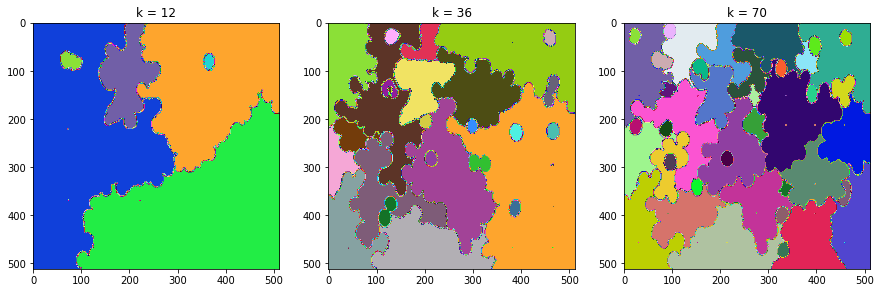

In [ ]:
import matplotlib
cmaprand = matplotlib.colors.ListedColormap(np.random.rand(256, 3))

if student :
  wat1 = morpho.watershed(morpho_grad, 12)
  wat2 = morpho.watershed(morpho_grad, 36)
  wat3 = morpho.watershed(morpho_grad, 70)

  fig,ax = plt.subplots(1, 3, figsize=(15, 15))
  imgs = [wat1, wat2, wat3]
  tts = ['k = 12', 'k = 36', 'k = 70']

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap=cmaprand)

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better? In which sense and why?
- **A** : When the watershed algorithm is applied to a closing gradient of the image, what it is done is cathing as basins the homogeneous gray levels of the image. As the closing is used to fill small holes in the image, preserving the shape and edges, the result is similar. 

- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous? 
- **A** : The opening morphological operation is responsible for removing small objects, lines or noise in the original image (in this case, the gradient image). When the watershed algorithm is applied to an opened gradient image, the result is not that better than what was found in the closing watershed. In some parts of the image, what was separated by the closing (correct, because it separates different cells), the opening make them appear together. 

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``wate

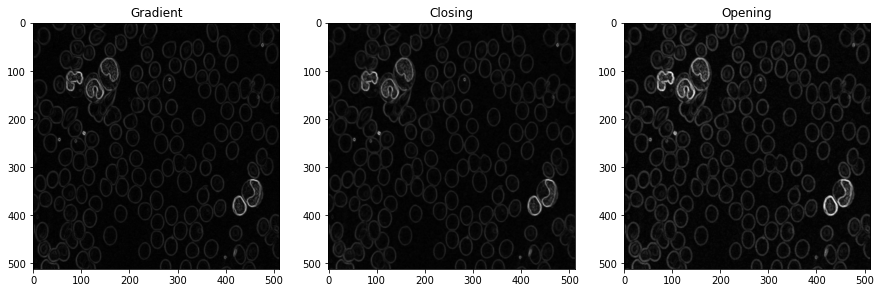

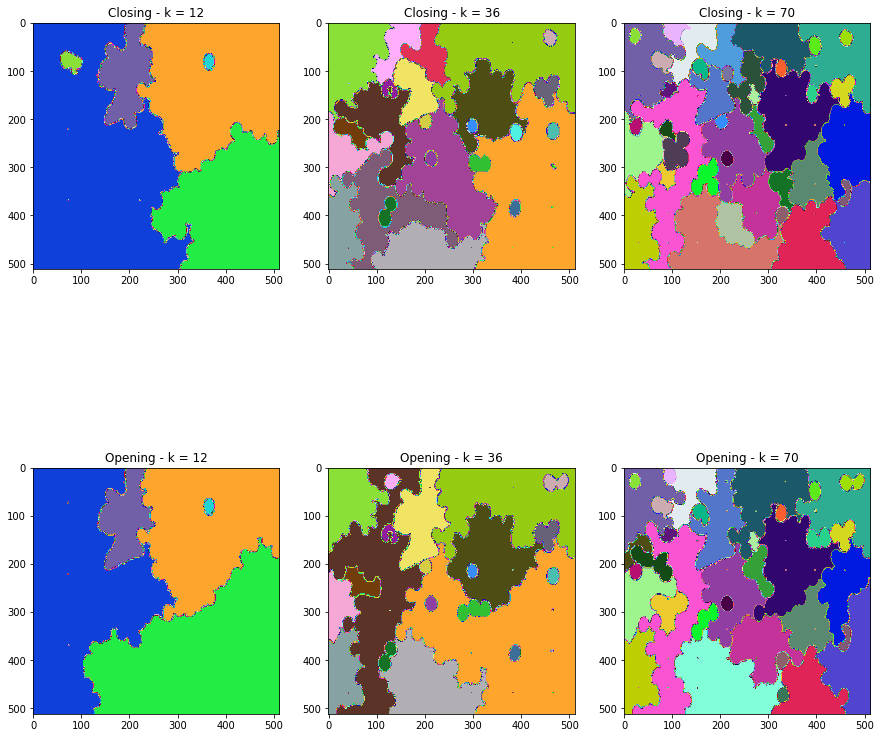

In [ ]:
if student:
  se = morpho.disk(1)
  wat_closing = morpho.closing(morpho_grad, se)
  wat_opening = morpho.opening(morpho_grad, se)

  wat1 = morpho.watershed(wat_closing, 12)
  wat2 = morpho.watershed(wat_closing, 36)
  wat3 = morpho.watershed(wat_closing, 70)

  wat4 = morpho.watershed(wat_opening, 12)
  wat5 = morpho.watershed(wat_opening, 36)
  wat6 = morpho.watershed(wat_opening, 70)

  fig,ax = plt.subplots(1, 3, figsize=(15, 15))
  imgs = [morpho_grad, wat_closing, wat_opening]
  tts = ['Gradient', 'Closing', 'Opening']

  for i in range(3):
    ax[i].set_title(tts[i])
    ax[i].imshow(imgs[i], cmap='gray')
  plt.show()

  print('\n')

  fig,ax = plt.subplots(2, 3, figsize=(15, 15))
  imgs = [wat1, wat2, wat3, wat4, wat5, wat6]
  tts = ['Closing - k = 12', 'Closing - k = 36', 'Closing - k = 70',
         'Opening - k = 12', 'Opening - k = 36', 'Opening - k = 70'
         ]

  for i in range(6):
    ax[i//3, i%3].set_title(tts[i])
    ax[i//3, i%3].imshow(imgs[i], cmap=cmaprand)
  plt.show()

We now propose to try to do better than what you did with the closure and opening by using specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : The reconstruction is a method similar to morphological dilation. We can think of it like a isolating method, since it separates better the connected regions of the image. As we are implementing the dilation reconstruction, it will find the local maxima in the seed image (opening of gradient) and connect them, highlighting the edges. In this case, this method could help segment images.

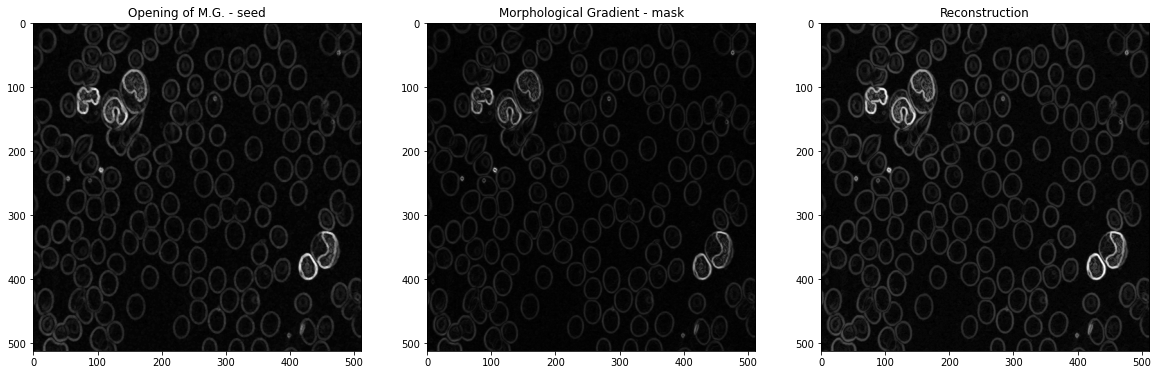

In [ ]:
imOpen = morpho.opening(morpho_grad, se)
reco = morpho.reconstruction(imOpen, morpho_grad)

fig,ax = plt.subplots(1, 3, figsize=(20, 20))
imgs = [imOpen, morpho_grad, reco]
tts = [ 
    'Opening of M.G. - seed',
    'Morphological Gradient - mask',
    'Reconstruction'
    ]

for i in range(3):
  ax[i].set_title(tts[i])
  ax[i].imshow(imgs[i], cmap='gray')
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : The closing algorithm will preserve the same structures of the original image and will fullfil some holes, putting the shapes more close. In this case, the segmentation would be more difficult to obtain an efficient result.

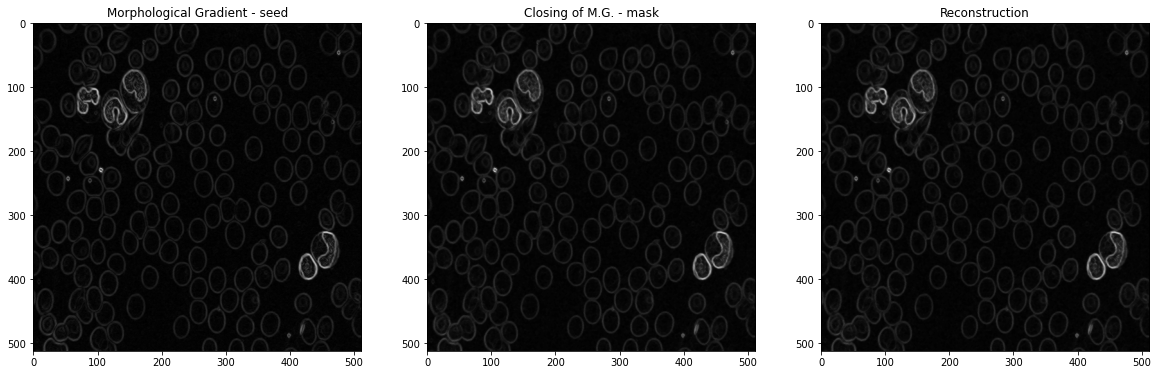

In [ ]:
imClos = morpho.closing(morpho_grad, se)
reco = morpho.reconstruction(morpho_grad, imClos)

fig,ax = plt.subplots(1, 3, figsize=(20, 20))
imgs = [morpho_grad, imClos, reco]
tts = [ 
    'Morphological Gradient - seed',
    'Closing of M.G. - mask',
    'Reconstruction'
    ]

for i in range(3):
  ax[i].set_title(tts[i])
  ax[i].imshow(imgs[i], cmap='gray')
plt.show()

**Q** : Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

**A**: As it is possible to see in the results image, the opening is better than closing to find peaks, after the reconstruction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is d

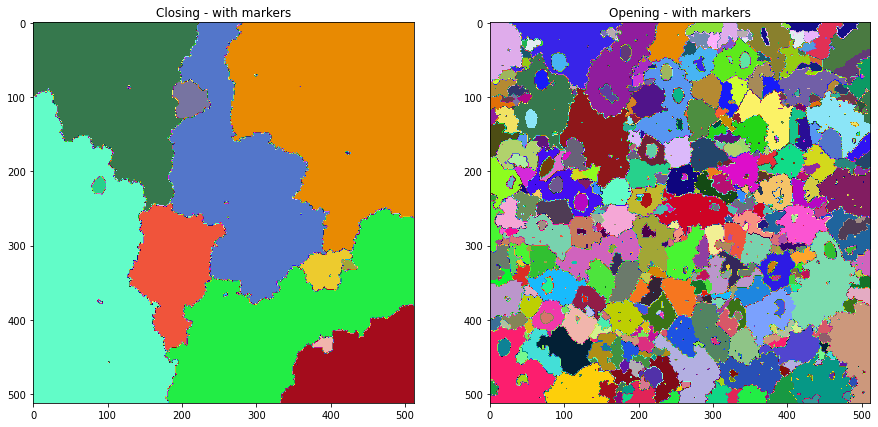

In [ ]:
from scipy import ndimage

# reconstruction
recoOpen = morpho.reconstruction(imOpen, morpho_grad)
recoClos = morpho.reconstruction(morpho_grad, imClos)

# find the distances to the nearest pixel with zero intensity
distOpen = ndimage.distance_transform_edt(recoOpen)
distClos = ndimage.distance_transform_edt(recoClos)

# calculate the peaks in the image
l_maxOpen = ft.peak_local_max(distOpen, min_distance=5, indices=False)
l_maxClos = ft.peak_local_max(distClos, min_distance=5, indices=False)

# attribute the markers
markerOpen = morpho.label(l_maxOpen)
markerClos = morpho.label(l_maxClos)

# perform the watershed algorithm
watOpen = morpho.watershed(-recoOpen, markerOpen)
watClos = morpho.watershed(-recoClos, markerClos)

fig,ax = plt.subplots(1, 2, figsize=(15, 15))
imgs = [watClos, watOpen]
tts = [ 
    'Closing - with markers',
    'Opening - with markers',
    ]

for i in range(2):
  ax[i].set_title(tts[i])
  ax[i].imshow(imgs[i], cmap=cmaprand)
plt.show()